In [179]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# 20km/h Plot

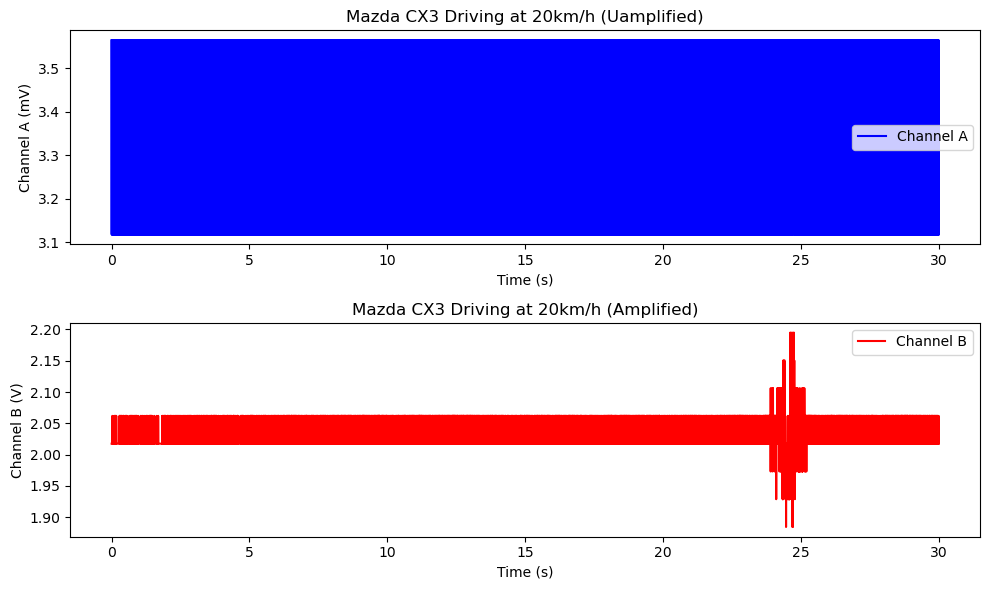

In [180]:
# Initialize lists to store data
time = []
channel_a = []
channel_b = []

# Open the file and read data
with open('20km.txt', 'r') as file:
    # Skip the header line
    next(file)
    next(file)
    next(file)
    
    # Read data line by line
    for line in file:
        parts = line.strip().split('\t')
        time.append(float(parts[0]))
        channel_a.append(float(parts[1]))
        channel_b.append(float(parts[2]))

# Create separate plots for Channel A and Channel B
plt.figure(figsize=(10, 6))

# Plot for Channel A
plt.subplot(2, 1, 1)
plt.plot(time, channel_a, label='Channel A', color='blue')
plt.title('Mazda CX3 Driving at 20km/h (Uamplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel A (mV)')
plt.legend()

# Plot for Channel B
plt.subplot(2, 1, 2)
plt.plot(time, channel_b, label='Channel B', color='red')
plt.title('Mazda CX3 Driving at 20km/h (Amplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel B (V)')
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


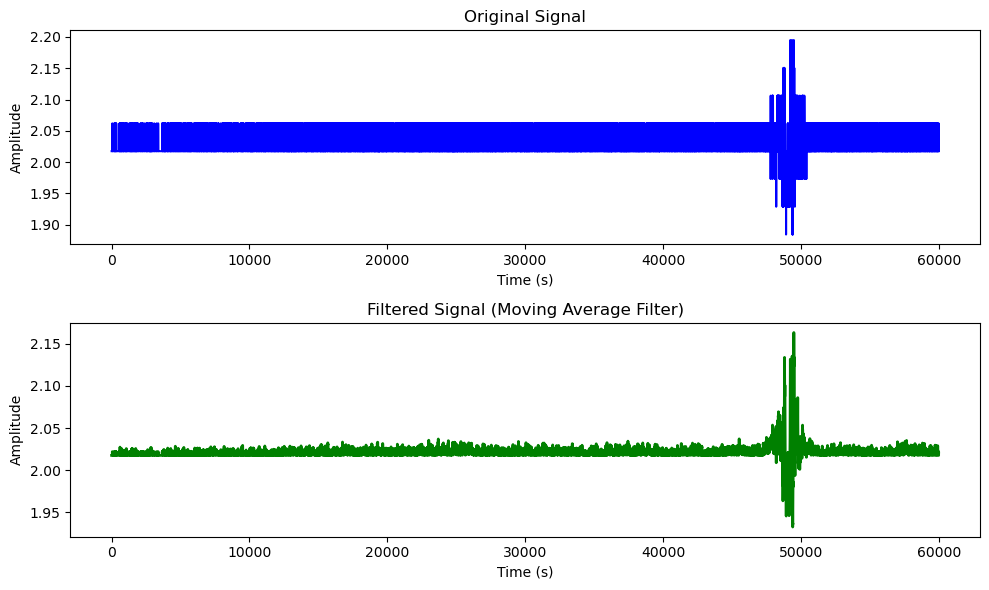

In [181]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.1  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in channel_b]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(channel_b, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


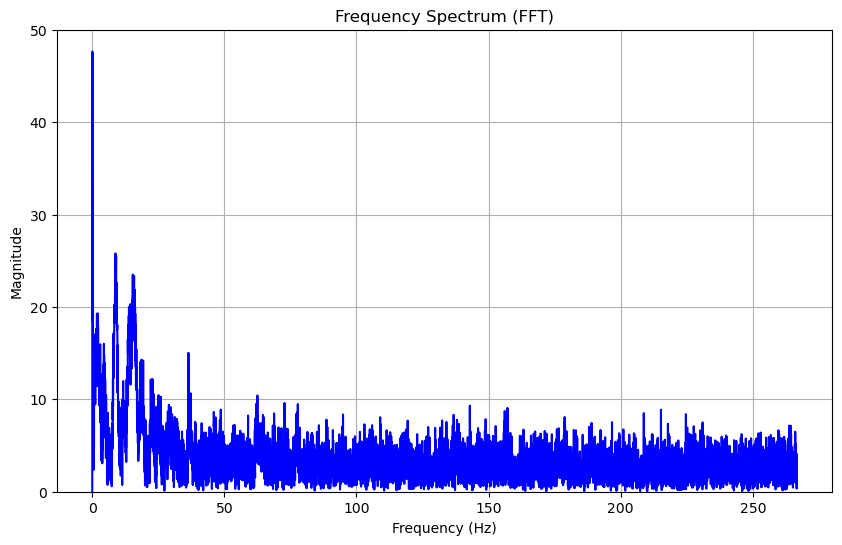

In [182]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(channel_b)
fft_freqs = np.fft.fftfreq(len(channel_b), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2][0:8000], fft_magnitude[:len(fft_magnitude) // 2][0:8000], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,50)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

# 40km/h Plots

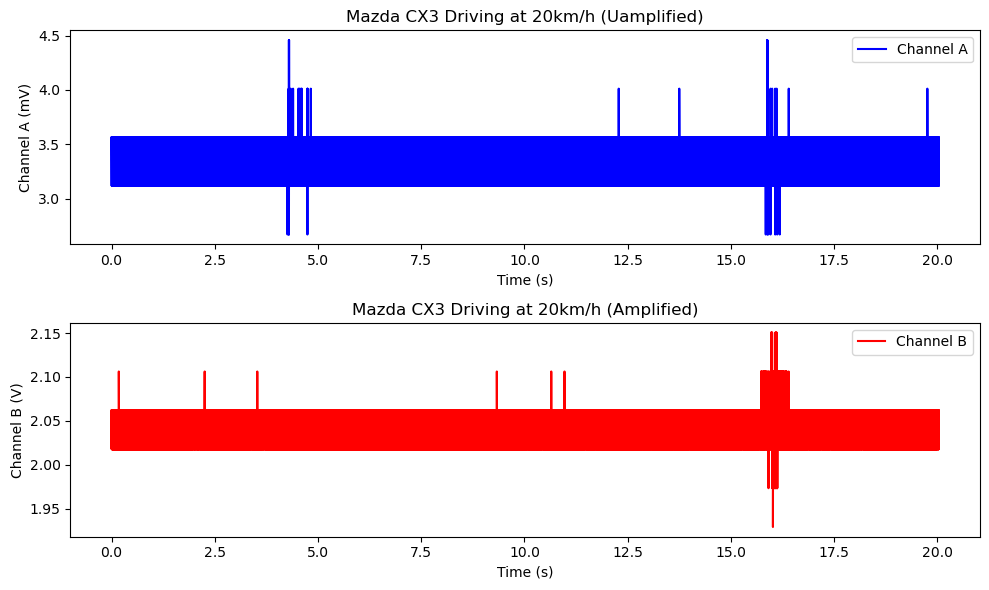

In [183]:
# Initialize lists to store data
time = []
channel_a = []
channel_b = []

# Open the file and read data
with open('40kmHighSamplingRate.txt', 'r') as file:
    # Skip the header line
    next(file)
    next(file)
    next(file)
    
    # Read data line by line
    for line in file:
        parts = line.strip().split('\t')
        time.append(float(parts[0]))
        channel_a.append(float(parts[1]))
        channel_b.append(float(parts[2]))

# Create separate plots for Channel A and Channel B
plt.figure(figsize=(10, 6))

# Plot for Channel A
plt.subplot(2, 1, 1)
plt.plot(time, channel_a, label='Channel A', color='blue')
plt.title('Mazda CX3 Driving at 20km/h (Uamplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel A (mV)')
plt.legend()

# Plot for Channel B
plt.subplot(2, 1, 2)
plt.plot(time, channel_b, label='Channel B', color='red')
plt.title('Mazda CX3 Driving at 20km/h (Amplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel B (V)')
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


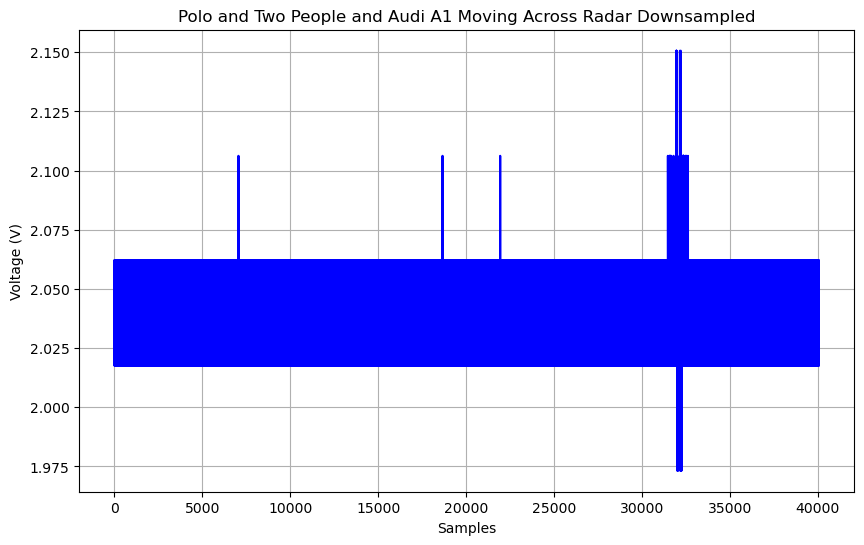

In [184]:
# Decimation factor (reduce data rate by keeping every Nth sample)
decimation_factor = 10  # Example: Keep every 4th sample

# Perform decimation
decimated_data = channel_b[::decimation_factor]

# Original data length and decimated data length
original_length = len(channel_b)
decimated_length = len(decimated_data)

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(decimated_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Polo and Two People and Audi A1 Moving Across Radar Downsampled')
plt.grid(True)


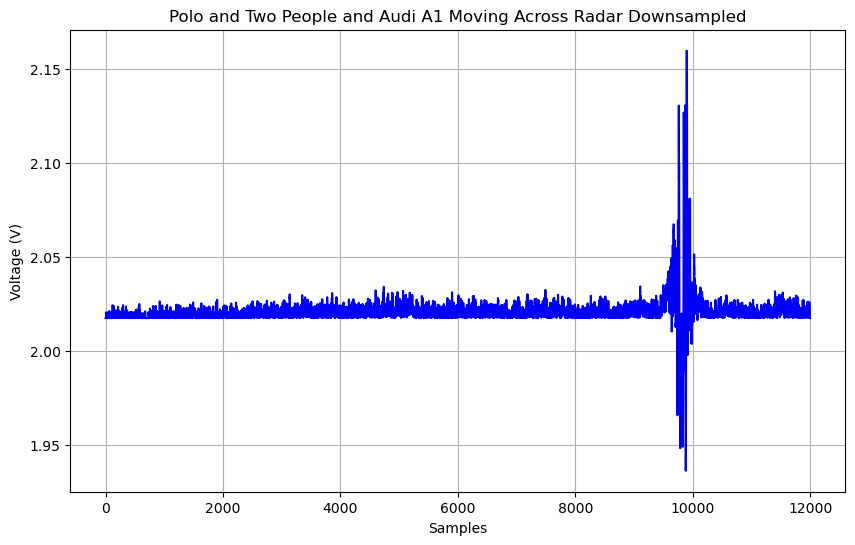

In [185]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Polo and Two People and Audi A1 Moving Across Radar Downsampled')
plt.grid(True)

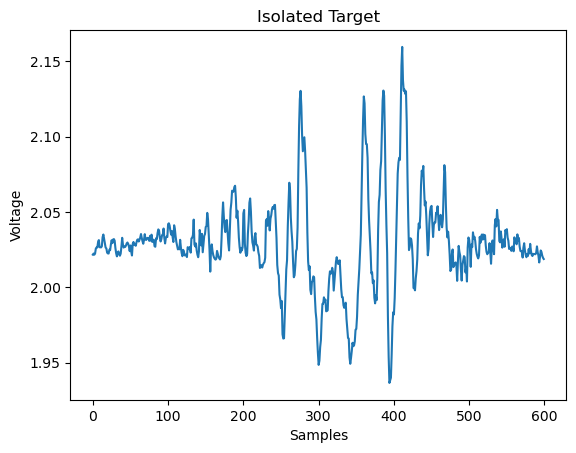

In [186]:
target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 2.04:
        target = downsampled_data[i-100:500+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

In [187]:
# # Example usage
# alpha = 0.1  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
# lowpass_filter = LowpassFilter(alpha)

# # Apply the lowpass filter to the input data
# filtered_data = [lowpass_filter.update(value) for value in target]
# filtered_data = np.array(filtered_data)
# # Now, filtered_data contains the filtered values.


# # Plot the original and filtered signals
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(target, 'b-', label='Original Signal')
# plt.title('Original Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# plt.subplot(2, 1, 2)
# plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
# plt.title('Filtered Signal (Moving Average Filter)')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# plt.tight_layout()
# plt.show()

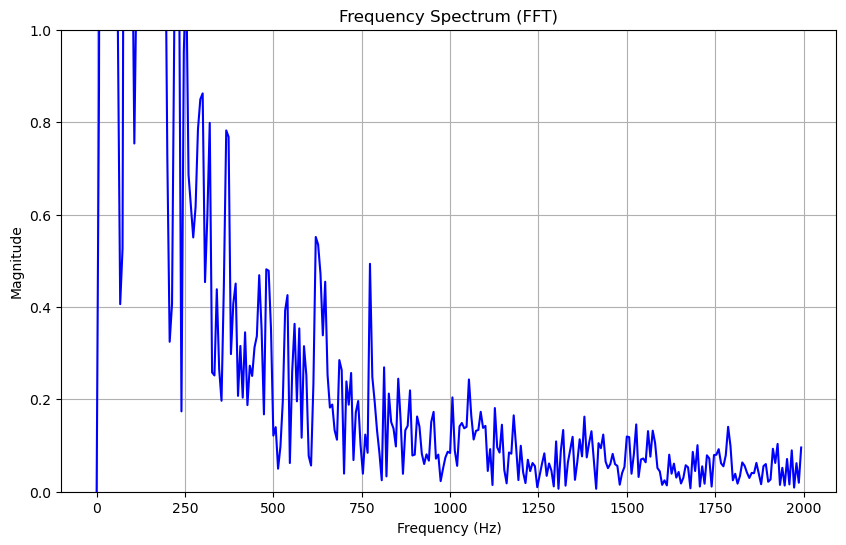

In [188]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 4000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,1)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

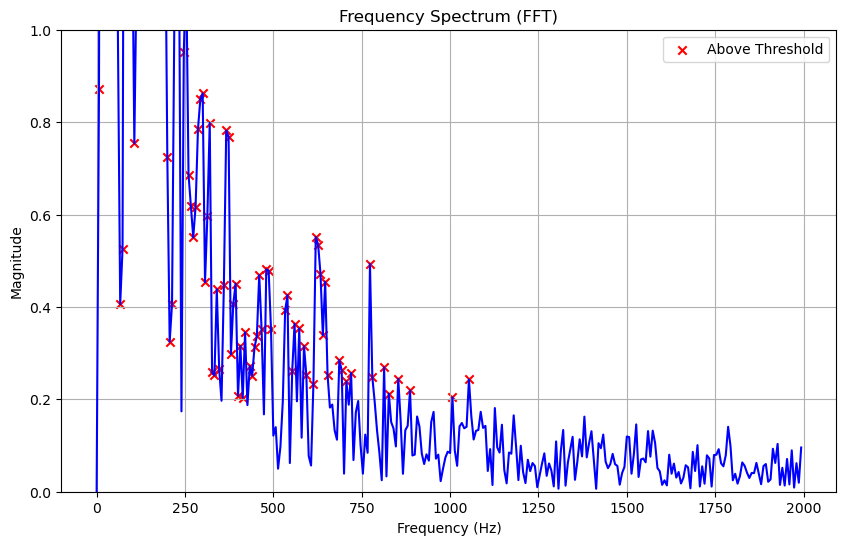

Frequencies above the threshold:
6.666666666666667 Hz
13.333333333333334 Hz
20.0 Hz
26.666666666666668 Hz
33.333333333333336 Hz
40.0 Hz
46.66666666666667 Hz
53.333333333333336 Hz
60.0 Hz
66.66666666666667 Hz
73.33333333333334 Hz
80.0 Hz
86.66666666666667 Hz
93.33333333333334 Hz
100.0 Hz
106.66666666666667 Hz
113.33333333333334 Hz
120.0 Hz
126.66666666666667 Hz
133.33333333333334 Hz
140.0 Hz
146.66666666666669 Hz
153.33333333333334 Hz
160.0 Hz
166.66666666666669 Hz
173.33333333333334 Hz
180.0 Hz
186.66666666666669 Hz
193.33333333333334 Hz
200.0 Hz
206.66666666666669 Hz
213.33333333333334 Hz
220.0 Hz
226.66666666666669 Hz
233.33333333333334 Hz
246.66666666666669 Hz
253.33333333333334 Hz
260.0 Hz
266.6666666666667 Hz
273.33333333333337 Hz
280.0 Hz
286.6666666666667 Hz
293.33333333333337 Hz
300.0 Hz
306.6666666666667 Hz
313.33333333333337 Hz
320.0 Hz
326.6666666666667 Hz
333.33333333333337 Hz
340.0 Hz
346.6666666666667 Hz
360.0 Hz
366.6666666666667 Hz
373.33333333333337 Hz
380.0 Hz
386.666

In [189]:
# Define a threshold (e.g., 0.2) for magnitude
threshold = 0.2

# Find the frequencies where magnitude is over the threshold
positive_frequencies = fft_freqs[:len(fft_freqs) // 2]
positive_magnitude = fft_magnitude[:len(fft_magnitude) // 2]
frequencies_above_threshold = positive_frequencies[positive_magnitude > threshold]

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(positive_frequencies, positive_magnitude, color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 1)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Highlight frequencies above the threshold
plt.scatter(frequencies_above_threshold, positive_magnitude[positive_magnitude > threshold], color='r', marker='x', label='Above Threshold')
plt.legend()

# Show the plot
plt.show()

# Print frequencies above the threshold
print("Frequencies above the threshold:")
for freq in frequencies_above_threshold:
    print(f"{freq} Hz")




# 60km/h Plots

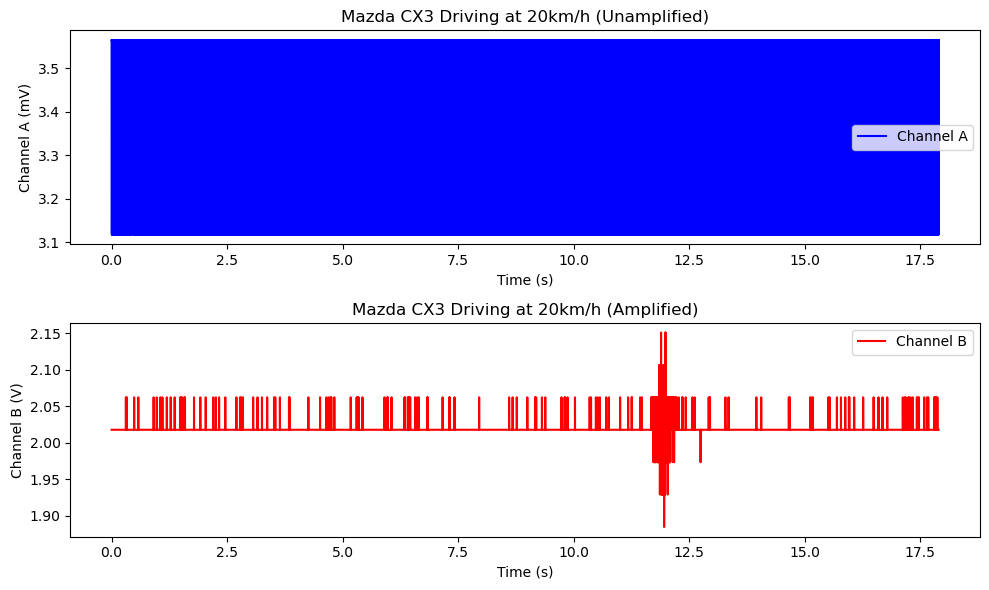

In [190]:
# Initialize lists to store data
time = []
channel_a = []
channel_b = []

# Open the file and read data
with open('60.txt', 'r') as file:
    # Skip the header line
    next(file)
    next(file)
    next(file)
    
    # Read data line by line
    for line in file:
        parts = line.strip().split('\t')
        time.append(float(parts[0]))
        channel_a.append(float(parts[1]))
        channel_b.append(float(parts[2]))

# Create separate plots for Channel A and Channel B
plt.figure(figsize=(10, 6))

# Plot for Channel A
plt.subplot(2, 1, 1)
plt.plot(time, channel_a, label='Channel A', color='blue')
plt.title('Mazda CX3 Driving at 20km/h (Unamplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel A (mV)')
plt.legend()

# Plot for Channel B
plt.subplot(2, 1, 2)
plt.plot(time, channel_b, label='Channel B', color='red')
plt.title('Mazda CX3 Driving at 20km/h (Amplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel B (V)')
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


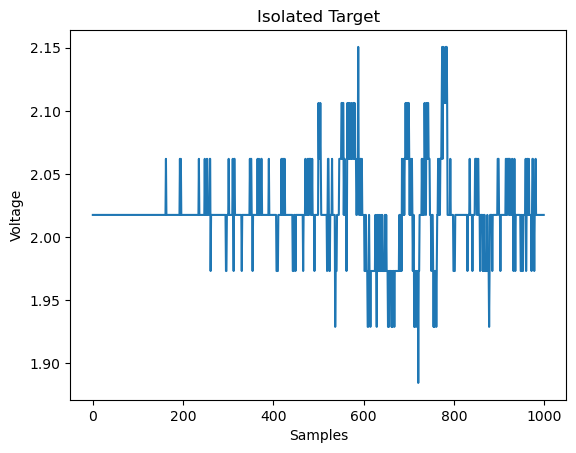

In [191]:

target = np.array(1000)



for i in range(len(channel_b)):
    if channel_b[i] > 2.07:
        target = channel_b[i-500:500+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()      


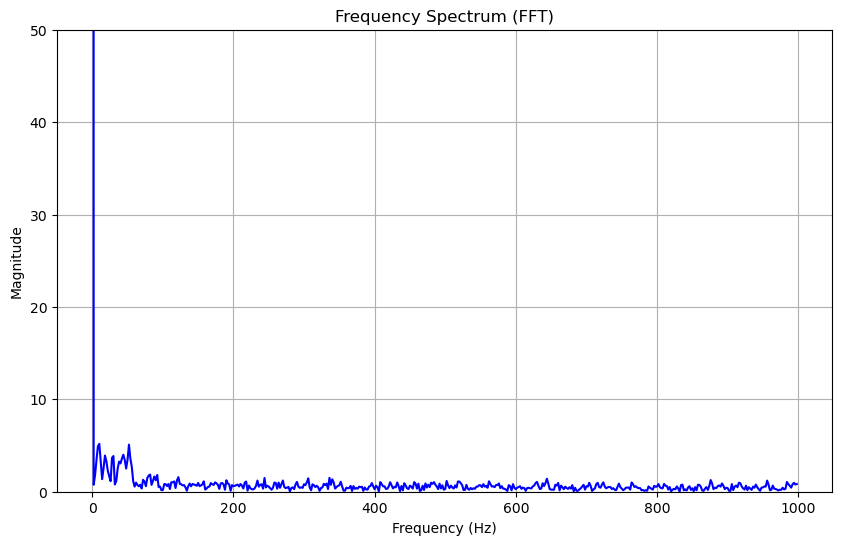

In [192]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2][0:8000], fft_magnitude[:len(fft_magnitude) // 2][0:8000], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,50)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

# 80km/h Plots

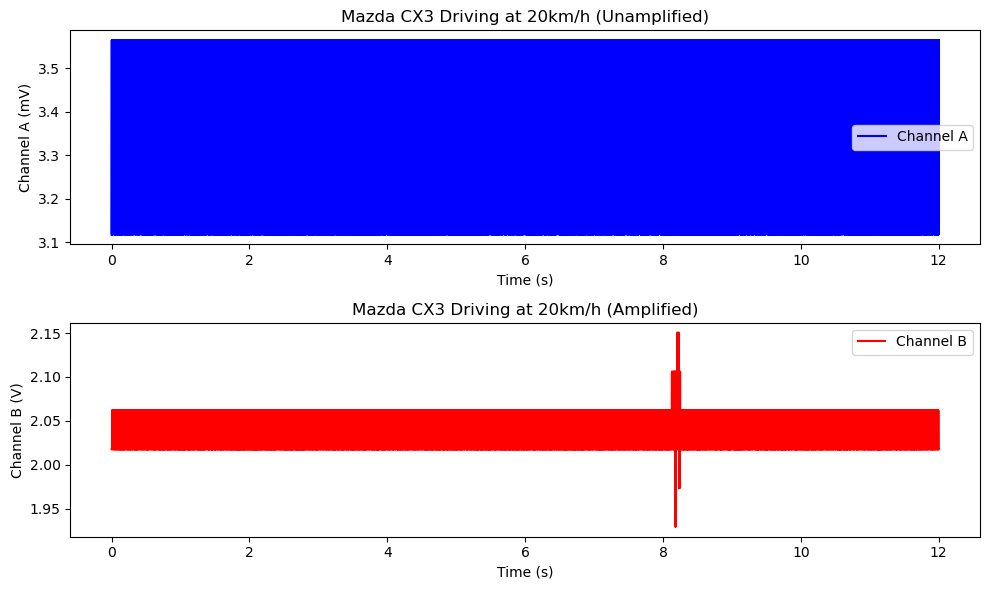

In [193]:
# Initialize lists to store data
time = []
channel_a = []
channel_b = []

# Open the file and read data
with open('80km.txt', 'r') as file:
    # Skip the header line
    next(file)
    next(file)
    next(file)
    
    # Read data line by line
    for line in file:
        parts = line.strip().split('\t')
        time.append(float(parts[0]))
        channel_a.append(float(parts[1]))
        channel_b.append(float(parts[2]))

# Create separate plots for Channel A and Channel B
plt.figure(figsize=(10, 6))

# Plot for Channel A
plt.subplot(2, 1, 1)
plt.plot(time, channel_a, label='Channel A', color='blue')
plt.title('Mazda CX3 Driving at 20km/h (Unamplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel A (mV)')
plt.legend()

# Plot for Channel B
plt.subplot(2, 1, 2)
plt.plot(time, channel_b, label='Channel B', color='red')
plt.title('Mazda CX3 Driving at 20km/h (Amplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel B (V)')
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


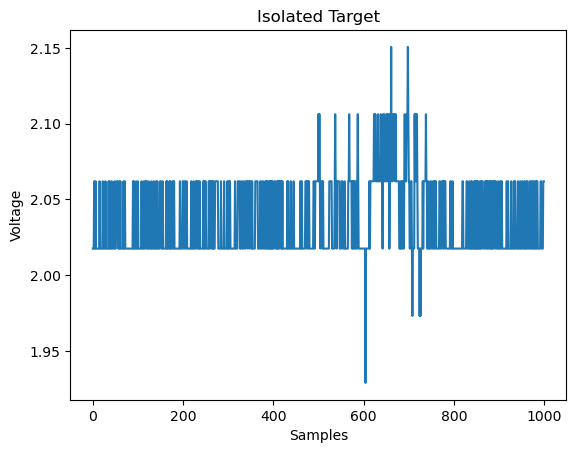

In [194]:

target = np.array(1000)



for i in range(len(channel_b)):
    if channel_b[i] > 2.07:
        target = channel_b[i-500:500+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()      


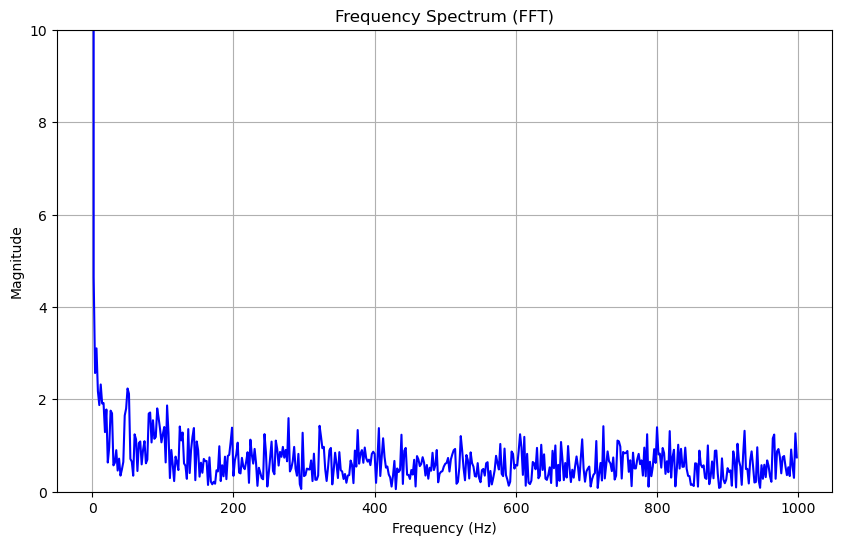

In [195]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0:30] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2][0:4000], fft_magnitude[:len(fft_magnitude) // 2][0:4000], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,10)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()